In [113]:
import pandas as pd 

url = "data.csv"

wine = pd.read_csv(url,header = None)
feat_labels = """
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline"""
feat_labels = [i.replace("-","").strip() for i in feat_labels.split("\n") if i != ""]

x,y = wine.iloc[1:,2:4].values,wine.iloc[1:,1].values


In [114]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
le = LabelEncoder()
y = le.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                test_size = 0.4,
                                                random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

/Users/paul.tgr/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/paul.tgr/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/paul.tgr/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [115]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = "entropy",
                             max_depth = None,
                             random_state = 1)
bag = BaggingClassifier(base_estimator = tree,
                       n_estimators = 500,
                       max_samples = 1.0,
                       max_features = 1.0,
                        bootstrap = True,
                       bootstrap_features = False,
                       n_jobs = 1,
                       random_state = 1)



In [116]:
from sklearn.metrics import accuracy_score 
tree = tree.fit(x_train,y_train)
y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)

tree_train = accuracy_score(y_train,y_train_pred)
tree_test = accuracy_score(y_test,y_test_pred)
print("TEST = {0:.2f} / TRAIN = {1:.2f}".format(tree_test,tree_train))

TEST = 0.86 / TRAIN = 1.00


In [117]:
bag = bag.fit(x_train,y_train)
y_train_pred = bag.predict(x_train)
y_test_pred = bag.predict(x_test)

bag_train = accuracy_score(y_train,y_train_pred)
bag_test = accuracy_score(y_test,y_test_pred)
print("TEST = {0:.2f} / TRAIN = {1:.2f}".format(bag_test,bag_train))

TEST = 0.86 / TRAIN = 1.00


In [118]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
def plot_decision_regions(x, y, classifier, test_idx = None, resolution = 0.2):


    markers = ("o","x","*","^","v")
    colors = ("red","blue","green","grey","cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    
    x1_min,x1_max = x[:,0].min() - 1, x[:,0].max() + 1
    x2_min,x2_max = x[:,1].min() - 1, x[:,1].max() + 1

    xx1,xx2 = np.meshgrid( np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution) )
    zx = np.array([ xx1.ravel(), xx2.ravel()]).T
    z = classifier.predict( zx )
    z = z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,z,alpha = 0.4,cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)): 
        plt.scatter(x = x[y == cl, 0],
                    y = x[ y == cl, 1],
                    alpha = 0.8,
                    cmap = cmap(idx),
                    marker = markers[idx],
                    label = cl )
        
        if test_idx:
            x_test, y_test = x[test_idx,:], y[test_idx]
            plt.scatter(x_test[:,0], 
                        x_test[:,1], 
                        c = "",
                        alpha = 1.0, 
                        linewidths = 1, 
                        marker = "o", 
                        s = 55,
                        label = "test set")

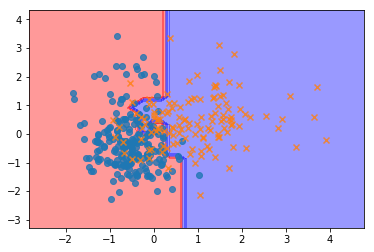

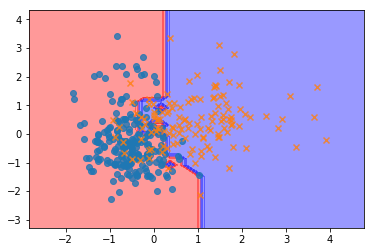

In [119]:
x_train = x_train.astype(float)
y_train = y_train.astype(float)
plot_decision_regions(x_train,y_train,classifier = tree)
plt.show()

plot_decision_regions(x_train,y_train,classifier = bag)
plt.show()